In [1]:
#參考資料
#https://youtu.be/crQkHHhY7aY 12分鐘cluster
#https://www.interactivebrokers.com/campus/ibkr-quant-news/hierarchical-clustering-in-python-a-comprehensive-implementation-guide-part-ii/

#https://youtu.be/0U9cs2V-Mqc 13分鐘heatmap

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib 顏色
#https://matplotlib.org/stable/users/explain/colors/colormaps.html 色條

#https://stackoverflow.com/questions/61816216/seaborn-clustermap-with-two-row-colors 兩條row_color


In [2]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
counts = pd.read_csv('nature.csv')
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
0,PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,...,6.63,7.08,6.53,6.72,6.39,6.52,6.51,6.51,6.62,6.89
1,BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,...,5.98,5.83,5.93,6.09,6.56,6.14,6.20,4.44,5.80,5.77
2,BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,...,6.23,4.49,5.40,5.03,4.93,4.88,4.77,4.46,5.40,4.34
3,BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,...,6.73,6.77,7.16,6.93,6.81,7.01,7.21,6.70,6.72,7.03
4,PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,...,6.26,5.91,5.89,6.35,6.23,6.12,6.65,5.90,6.19,6.19
5,STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,...,6.80,6.37,6.72,6.68,6.93,6.93,6.86,6.20,6.93,6.58
6,STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,...,5.60,5.28,5.31,5.62,5.81,5.97,5.54,5.42,5.76,5.76
7,BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,...,6.27,5.21,6.86,5.53,6.09,6.41,6.45,5.90,6.27,6.13
8,ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,...,6.80,7.68,6.90,6.87,7.29,6.95,6.94,6.17,7.89,7.64
9,PINK1,5.52,5.40,5.28,5.97,5.60,5.73,5.34,5.37,5.27,...,5.06,5.12,4.42,5.52,4.93,4.78,4.95,2.72,4.60,4.98


In [4]:
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
0,PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,...,6.63,7.08,6.53,6.72,6.39,6.52,6.51,6.51,6.62,6.89
1,BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,...,5.98,5.83,5.93,6.09,6.56,6.14,6.20,4.44,5.80,5.77
2,BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,...,6.23,4.49,5.40,5.03,4.93,4.88,4.77,4.46,5.40,4.34
3,BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,...,6.73,6.77,7.16,6.93,6.81,7.01,7.21,6.70,6.72,7.03
4,PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,...,6.26,5.91,5.89,6.35,6.23,6.12,6.65,5.90,6.19,6.19
5,STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,...,6.80,6.37,6.72,6.68,6.93,6.93,6.86,6.20,6.93,6.58
6,STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,...,5.60,5.28,5.31,5.62,5.81,5.97,5.54,5.42,5.76,5.76
7,BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,...,6.27,5.21,6.86,5.53,6.09,6.41,6.45,5.90,6.27,6.13
8,ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,...,6.80,7.68,6.90,6.87,7.29,6.95,6.94,6.17,7.89,7.64
9,PINK1,5.52,5.40,5.28,5.97,5.60,5.73,5.34,5.37,5.27,...,5.06,5.12,4.42,5.52,4.93,4.78,4.95,2.72,4.60,4.98


In [5]:
counts = counts.set_index('Gene Name')
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,7.01,...,6.63,7.08,6.53,6.72,6.39,6.52,6.51,6.51,6.62,6.89
BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,5.74,...,5.98,5.83,5.93,6.09,6.56,6.14,6.20,4.44,5.80,5.77
BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,5.08,...,6.23,4.49,5.40,5.03,4.93,4.88,4.77,4.46,5.40,4.34
BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,6.90,...,6.73,6.77,7.16,6.93,6.81,7.01,7.21,6.70,6.72,7.03
PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,5.91,...,6.26,5.91,5.89,6.35,6.23,6.12,6.65,5.90,6.19,6.19
STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,6.41,...,6.80,6.37,6.72,6.68,6.93,6.93,6.86,6.20,6.93,6.58
STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,5.28,...,5.60,5.28,5.31,5.62,5.81,5.97,5.54,5.42,5.76,5.76
BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,5.95,...,6.27,5.21,6.86,5.53,6.09,6.41,6.45,5.90,6.27,6.13
ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,6.80,...,6.80,7.68,6.90,6.87,7.29,6.95,6.94,6.17,7.89,7.64


In [6]:
counts = counts.T
counts

Gene Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
Adjacent Kidney,6.48,6.02,4.88,6.76,5.51,7.00,5.07,5.94,7.12,5.52,5.11,6.06
Adjacent Kidney.1,6.72,5.89,5.15,6.40,6.37,6.68,5.69,5.34,7.48,5.40,6.02,5.90
Adjacent Kidney.2,6.56,6.18,5.45,6.17,6.64,6.76,6.01,5.36,7.27,5.28,5.47,6.21
Adjacent Kidney.3,6.30,6.61,5.75,6.72,5.82,7.32,5.13,5.73,7.83,5.97,6.33,6.38
Adjacent Kidney.4,6.60,6.02,5.20,6.86,5.69,6.95,5.01,6.06,7.02,5.60,5.37,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...
Primary Tumour Papillary.3,6.52,6.14,4.88,7.01,6.12,6.93,5.97,6.41,6.95,4.78,4.59,5.92
Primary Tumour Papillary.4,6.51,6.20,4.77,7.21,6.65,6.86,5.54,6.45,6.94,4.95,4.57,5.96
Primary Tumour Papillary.5,6.51,4.44,4.46,6.70,5.90,6.20,5.42,5.90,6.17,2.72,3.82,4.72
Primary Tumour Papillary.6,6.62,5.80,5.40,6.72,6.19,6.93,5.76,6.27,7.89,4.60,4.37,6.23


In [7]:
minvalue_series = counts.min() 
minvalue_series

Gene Name
PPP2CA    5.80
BECN1     3.59
BAK1      2.46
BCL2L1    5.62
PIK3CB    4.24
STRN4     4.90
STRN3     3.43
BAX       4.03
ULK1      4.24
PINK1     2.62
PRKN      0.00
STK24     3.43
dtype: float64

In [8]:
maxvalue_series = counts.max() 
maxvalue_series

Gene Name
PPP2CA    7.42
BECN1     6.61
BAK1      6.42
BCL2L1    7.82
PIK3CB    6.92
STRN4     7.50
STRN3     6.29
BAX       7.22
ULK1      8.34
PINK1     5.97
PRKN      6.43
STK24     6.44
dtype: float64

In [9]:
counts

Gene Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
Adjacent Kidney,6.48,6.02,4.88,6.76,5.51,7.00,5.07,5.94,7.12,5.52,5.11,6.06
Adjacent Kidney.1,6.72,5.89,5.15,6.40,6.37,6.68,5.69,5.34,7.48,5.40,6.02,5.90
Adjacent Kidney.2,6.56,6.18,5.45,6.17,6.64,6.76,6.01,5.36,7.27,5.28,5.47,6.21
Adjacent Kidney.3,6.30,6.61,5.75,6.72,5.82,7.32,5.13,5.73,7.83,5.97,6.33,6.38
Adjacent Kidney.4,6.60,6.02,5.20,6.86,5.69,6.95,5.01,6.06,7.02,5.60,5.37,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...
Primary Tumour Papillary.3,6.52,6.14,4.88,7.01,6.12,6.93,5.97,6.41,6.95,4.78,4.59,5.92
Primary Tumour Papillary.4,6.51,6.20,4.77,7.21,6.65,6.86,5.54,6.45,6.94,4.95,4.57,5.96
Primary Tumour Papillary.5,6.51,4.44,4.46,6.70,5.90,6.20,5.42,5.90,6.17,2.72,3.82,4.72
Primary Tumour Papillary.6,6.62,5.80,5.40,6.72,6.19,6.93,5.76,6.27,7.89,4.60,4.37,6.23


In [10]:
counts = counts.T
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,6.48,6.72,6.56,6.30,6.60,6.40,6.86,6.77,6.92,7.01,...,6.63,7.08,6.53,6.72,6.39,6.52,6.51,6.51,6.62,6.89
BECN1,6.02,5.89,6.18,6.61,6.02,6.00,5.84,6.08,6.02,5.74,...,5.98,5.83,5.93,6.09,6.56,6.14,6.20,4.44,5.80,5.77
BAK1,4.88,5.15,5.45,5.75,5.20,4.89,4.95,4.58,4.78,5.08,...,6.23,4.49,5.40,5.03,4.93,4.88,4.77,4.46,5.40,4.34
BCL2L1,6.76,6.40,6.17,6.72,6.86,6.85,6.74,6.19,7.07,6.90,...,6.73,6.77,7.16,6.93,6.81,7.01,7.21,6.70,6.72,7.03
PIK3CB,5.51,6.37,6.64,5.82,5.69,6.05,6.47,5.34,6.09,5.91,...,6.26,5.91,5.89,6.35,6.23,6.12,6.65,5.90,6.19,6.19
STRN4,7.00,6.68,6.76,7.32,6.95,6.86,6.73,6.62,6.58,6.41,...,6.80,6.37,6.72,6.68,6.93,6.93,6.86,6.20,6.93,6.58
STRN3,5.07,5.69,6.01,5.13,5.01,5.08,5.38,5.68,5.54,5.28,...,5.60,5.28,5.31,5.62,5.81,5.97,5.54,5.42,5.76,5.76
BAX,5.94,5.34,5.36,5.73,6.06,5.51,6.10,5.18,6.46,5.95,...,6.27,5.21,6.86,5.53,6.09,6.41,6.45,5.90,6.27,6.13
ULK1,7.12,7.48,7.27,7.83,7.02,7.29,7.19,7.56,6.77,6.80,...,6.80,7.68,6.90,6.87,7.29,6.95,6.94,6.17,7.89,7.64


In [11]:
for col in counts:
    counts[col] = (counts[col] - minvalue_series) / (maxvalue_series - minvalue_series)
counts

,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,Adjacent Kidney.9,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,0.419753,0.567901,0.469136,0.308642,0.493827,0.370370,0.654321,0.598765,0.691358,0.746914,...,0.512346,0.790123,0.450617,0.567901,0.364198,0.444444,0.438272,0.438272,0.506173,0.672840
BECN1,0.804636,0.761589,0.857616,1.000000,0.804636,0.798013,0.745033,0.824503,0.804636,0.711921,...,0.791391,0.741722,0.774834,0.827815,0.983444,0.844371,0.864238,0.281457,0.731788,0.721854
BAK1,0.611111,0.679293,0.755051,0.830808,0.691919,0.613636,0.628788,0.535354,0.585859,0.661616,...,0.952020,0.512626,0.742424,0.648990,0.623737,0.611111,0.583333,0.505051,0.742424,0.474747
BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,0.581818,...,0.504545,0.522727,0.700000,0.595455,0.540909,0.631818,0.722727,0.490909,0.500000,0.640909
PIK3CB,0.473881,0.794776,0.895522,0.589552,0.541045,0.675373,0.832090,0.410448,0.690299,0.623134,...,0.753731,0.623134,0.615672,0.787313,0.742537,0.701493,0.899254,0.619403,0.727612,0.727612
STRN4,0.807692,0.684615,0.715385,0.930769,0.788462,0.753846,0.703846,0.661538,0.646154,0.580769,...,0.730769,0.565385,0.700000,0.684615,0.780769,0.780769,0.753846,0.500000,0.780769,0.646154
STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,0.646853,...,0.758741,0.646853,0.657343,0.765734,0.832168,0.888112,0.737762,0.695804,0.814685,0.814685
BAX,0.598746,0.410658,0.416928,0.532915,0.636364,0.463950,0.648903,0.360502,0.761755,0.601881,...,0.702194,0.369906,0.887147,0.470219,0.645768,0.746082,0.758621,0.586207,0.702194,0.658307
ULK1,0.702439,0.790244,0.739024,0.875610,0.678049,0.743902,0.719512,0.809756,0.617073,0.624390,...,0.624390,0.839024,0.648780,0.641463,0.743902,0.660976,0.658537,0.470732,0.890244,0.829268


In [12]:
counts = counts.reset_index(drop=False)
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney.1,Adjacent Kidney.2,Adjacent Kidney.3,Adjacent Kidney.4,Adjacent Kidney.5,Adjacent Kidney.6,Adjacent Kidney.7,Adjacent Kidney.8,...,Primary Tumour Oncocytic.2,Primary Tumour Oncocytic.3,Primary Tumour Papillary,Primary Tumour Papillary.1,Primary Tumour Papillary.2,Primary Tumour Papillary.3,Primary Tumour Papillary.4,Primary Tumour Papillary.5,Primary Tumour Papillary.6,Primary Tumour Papillary.7
0,PPP2CA,0.419753,0.567901,0.469136,0.308642,0.493827,0.370370,0.654321,0.598765,0.691358,...,0.512346,0.790123,0.450617,0.567901,0.364198,0.444444,0.438272,0.438272,0.506173,0.672840
1,BECN1,0.804636,0.761589,0.857616,1.000000,0.804636,0.798013,0.745033,0.824503,0.804636,...,0.791391,0.741722,0.774834,0.827815,0.983444,0.844371,0.864238,0.281457,0.731788,0.721854
2,BAK1,0.611111,0.679293,0.755051,0.830808,0.691919,0.613636,0.628788,0.535354,0.585859,...,0.952020,0.512626,0.742424,0.648990,0.623737,0.611111,0.583333,0.505051,0.742424,0.474747
3,BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,...,0.504545,0.522727,0.700000,0.595455,0.540909,0.631818,0.722727,0.490909,0.500000,0.640909
4,PIK3CB,0.473881,0.794776,0.895522,0.589552,0.541045,0.675373,0.832090,0.410448,0.690299,...,0.753731,0.623134,0.615672,0.787313,0.742537,0.701493,0.899254,0.619403,0.727612,0.727612
5,STRN4,0.807692,0.684615,0.715385,0.930769,0.788462,0.753846,0.703846,0.661538,0.646154,...,0.730769,0.565385,0.700000,0.684615,0.780769,0.780769,0.753846,0.500000,0.780769,0.646154
6,STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,...,0.758741,0.646853,0.657343,0.765734,0.832168,0.888112,0.737762,0.695804,0.814685,0.814685
7,BAX,0.598746,0.410658,0.416928,0.532915,0.636364,0.463950,0.648903,0.360502,0.761755,...,0.702194,0.369906,0.887147,0.470219,0.645768,0.746082,0.758621,0.586207,0.702194,0.658307
8,ULK1,0.702439,0.790244,0.739024,0.875610,0.678049,0.743902,0.719512,0.809756,0.617073,...,0.624390,0.839024,0.648780,0.641463,0.743902,0.660976,0.658537,0.470732,0.890244,0.829268
9,PINK1,0.865672,0.829851,0.794030,1.000000,0.889552,0.928358,0.811940,0.820896,0.791045,...,0.728358,0.746269,0.537313,0.865672,0.689552,0.644776,0.695522,0.029851,0.591045,0.704478


In [13]:
# list(counts.columns.values)

In [14]:
columns_name = counts.columns.tolist()
print(columns_name)

['Gene Name', 'Adjacent Kidney', 'Adjacent Kidney.1', 'Adjacent Kidney.2', 'Adjacent Kidney.3', 'Adjacent Kidney.4', 'Adjacent Kidney.5', 'Adjacent Kidney.6', 'Adjacent Kidney.7', 'Adjacent Kidney.8', 'Adjacent Kidney.9', 'Adjacent Kidney.10', 'Adjacent Kidney.11', 'Adjacent Kidney.12', 'Adjacent Kidney.13', 'Adjacent Kidney.14', 'Adjacent Kidney.15', 'Adjacent Kidney.16', 'Adjacent Kidney.17', 'Adjacent Kidney.18', 'Adjacent Kidney.19', 'Adjacent Kidney.20', 'Adjacent Kidney.21', 'Adjacent Kidney.22', 'Adjacent Kidney.23', 'Adjacent Kidney.24', 'Adjacent Kidney.25', 'Adjacent Kidney.26', 'Adjacent Kidney.27', 'Adjacent Kidney.28', 'Adjacent Kidney.29', 'Adjacent Kidney.30', 'Adjacent Kidney.31', 'Adjacent Kidney.32', 'Adjacent Kidney.33', 'Adjacent Kidney.34', 'Adjacent Kidney.35', 'Adjacent Kidney.36', 'Adjacent Kidney.37', 'Adjacent Kidney.38', 'Adjacent Kidney.39', 'Adjacent Kidney.40', 'Adjacent Kidney.41', 'Adjacent Kidney.42', 'Adjacent Kidney.43', 'Adjacent Kidney.44', 'Adjacen

In [15]:
#去掉index尾端的' '
for i in range(len(columns_name)):
    k = columns_name[i].split(".")
    if k[0][-1] == " ":
        k[0] = k[0][:-1]
    columns_name[i] = k[0]
print(counts.columns)

Index(['Gene Name', 'Adjacent Kidney', 'Adjacent Kidney.1',
       'Adjacent Kidney.2', 'Adjacent Kidney.3', 'Adjacent Kidney.4',
       'Adjacent Kidney.5', 'Adjacent Kidney.6', 'Adjacent Kidney.7',
       'Adjacent Kidney.8',
       ...
       'Primary Tumour Oncocytic.2', 'Primary Tumour Oncocytic.3',
       'Primary Tumour Papillary', 'Primary Tumour Papillary.1',
       'Primary Tumour Papillary.2', 'Primary Tumour Papillary.3',
       'Primary Tumour Papillary.4', 'Primary Tumour Papillary.5',
       'Primary Tumour Papillary.6', 'Primary Tumour Papillary.7'],
      dtype='object', length=123)


In [16]:
#把每個index後面的小數點去掉
if len(columns_name) == len(counts.columns):
    counts.columns = columns_name
print(counts.columns)

Index(['Gene Name', 'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       'Adjacent Kidney', 'Adjacent Kidney', 'Adjacent Kidney',
       ...
       'Primary Tumour Oncocytic', 'Primary Tumour Oncocytic',
       'Primary Tumour Papillary', 'Primary Tumour Papillary',
       'Primary Tumour Papillary', 'Primary Tumour Papillary',
       'Primary Tumour Papillary', 'Primary Tumour Papillary',
       'Primary Tumour Papillary', 'Primary Tumour Papillary'],
      dtype='object', length=123)


In [17]:
counts

,Gene Name,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,...,Primary Tumour Oncocytic,Primary Tumour Oncocytic,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary
0,PPP2CA,0.419753,0.567901,0.469136,0.308642,0.493827,0.370370,0.654321,0.598765,0.691358,...,0.512346,0.790123,0.450617,0.567901,0.364198,0.444444,0.438272,0.438272,0.506173,0.672840
1,BECN1,0.804636,0.761589,0.857616,1.000000,0.804636,0.798013,0.745033,0.824503,0.804636,...,0.791391,0.741722,0.774834,0.827815,0.983444,0.844371,0.864238,0.281457,0.731788,0.721854
2,BAK1,0.611111,0.679293,0.755051,0.830808,0.691919,0.613636,0.628788,0.535354,0.585859,...,0.952020,0.512626,0.742424,0.648990,0.623737,0.611111,0.583333,0.505051,0.742424,0.474747
3,BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,...,0.504545,0.522727,0.700000,0.595455,0.540909,0.631818,0.722727,0.490909,0.500000,0.640909
4,PIK3CB,0.473881,0.794776,0.895522,0.589552,0.541045,0.675373,0.832090,0.410448,0.690299,...,0.753731,0.623134,0.615672,0.787313,0.742537,0.701493,0.899254,0.619403,0.727612,0.727612
5,STRN4,0.807692,0.684615,0.715385,0.930769,0.788462,0.753846,0.703846,0.661538,0.646154,...,0.730769,0.565385,0.700000,0.684615,0.780769,0.780769,0.753846,0.500000,0.780769,0.646154
6,STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,...,0.758741,0.646853,0.657343,0.765734,0.832168,0.888112,0.737762,0.695804,0.814685,0.814685
7,BAX,0.598746,0.410658,0.416928,0.532915,0.636364,0.463950,0.648903,0.360502,0.761755,...,0.702194,0.369906,0.887147,0.470219,0.645768,0.746082,0.758621,0.586207,0.702194,0.658307
8,ULK1,0.702439,0.790244,0.739024,0.875610,0.678049,0.743902,0.719512,0.809756,0.617073,...,0.624390,0.839024,0.648780,0.641463,0.743902,0.660976,0.658537,0.470732,0.890244,0.829268
9,PINK1,0.865672,0.829851,0.794030,1.000000,0.889552,0.928358,0.811940,0.820896,0.791045,...,0.728358,0.746269,0.537313,0.865672,0.689552,0.644776,0.695522,0.029851,0.591045,0.704478


In [ ]:
#以下開始做圖

In [18]:
counts = counts.set_index('Gene Name')
counts

,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,Adjacent Kidney,...,Primary Tumour Oncocytic,Primary Tumour Oncocytic,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary,Primary Tumour Papillary
Gene Name,,,,,,,,,,,,,,,,,,,,,
PPP2CA,0.419753,0.567901,0.469136,0.308642,0.493827,0.370370,0.654321,0.598765,0.691358,0.746914,...,0.512346,0.790123,0.450617,0.567901,0.364198,0.444444,0.438272,0.438272,0.506173,0.672840
BECN1,0.804636,0.761589,0.857616,1.000000,0.804636,0.798013,0.745033,0.824503,0.804636,0.711921,...,0.791391,0.741722,0.774834,0.827815,0.983444,0.844371,0.864238,0.281457,0.731788,0.721854
BAK1,0.611111,0.679293,0.755051,0.830808,0.691919,0.613636,0.628788,0.535354,0.585859,0.661616,...,0.952020,0.512626,0.742424,0.648990,0.623737,0.611111,0.583333,0.505051,0.742424,0.474747
BCL2L1,0.518182,0.354545,0.250000,0.500000,0.563636,0.559091,0.509091,0.259091,0.659091,0.581818,...,0.504545,0.522727,0.700000,0.595455,0.540909,0.631818,0.722727,0.490909,0.500000,0.640909
PIK3CB,0.473881,0.794776,0.895522,0.589552,0.541045,0.675373,0.832090,0.410448,0.690299,0.623134,...,0.753731,0.623134,0.615672,0.787313,0.742537,0.701493,0.899254,0.619403,0.727612,0.727612
STRN4,0.807692,0.684615,0.715385,0.930769,0.788462,0.753846,0.703846,0.661538,0.646154,0.580769,...,0.730769,0.565385,0.700000,0.684615,0.780769,0.780769,0.753846,0.500000,0.780769,0.646154
STRN3,0.573427,0.790210,0.902098,0.594406,0.552448,0.576923,0.681818,0.786713,0.737762,0.646853,...,0.758741,0.646853,0.657343,0.765734,0.832168,0.888112,0.737762,0.695804,0.814685,0.814685
BAX,0.598746,0.410658,0.416928,0.532915,0.636364,0.463950,0.648903,0.360502,0.761755,0.601881,...,0.702194,0.369906,0.887147,0.470219,0.645768,0.746082,0.758621,0.586207,0.702194,0.658307
ULK1,0.702439,0.790244,0.739024,0.875610,0.678049,0.743902,0.719512,0.809756,0.617073,0.624390,...,0.624390,0.839024,0.648780,0.641463,0.743902,0.660976,0.658537,0.470732,0.890244,0.829268


In [19]:
counts = counts.T
counts

Gene Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
Adjacent Kidney,0.419753,0.804636,0.611111,0.518182,0.473881,0.807692,0.573427,0.598746,0.702439,0.865672,0.794712,0.873754
Adjacent Kidney,0.567901,0.761589,0.679293,0.354545,0.794776,0.684615,0.790210,0.410658,0.790244,0.829851,0.936236,0.820598
Adjacent Kidney,0.469136,0.857616,0.755051,0.250000,0.895522,0.715385,0.902098,0.416928,0.739024,0.794030,0.850700,0.923588
Adjacent Kidney,0.308642,1.000000,0.830808,0.500000,0.589552,0.930769,0.594406,0.532915,0.875610,1.000000,0.984448,0.980066
Adjacent Kidney,0.493827,0.804636,0.691919,0.563636,0.541045,0.788462,0.552448,0.636364,0.678049,0.889552,0.835148,0.906977
...,...,...,...,...,...,...,...,...,...,...,...,...
Primary Tumour Papillary,0.444444,0.844371,0.611111,0.631818,0.701493,0.780769,0.888112,0.746082,0.660976,0.644776,0.713841,0.827243
Primary Tumour Papillary,0.438272,0.864238,0.583333,0.722727,0.899254,0.753846,0.737762,0.758621,0.658537,0.695522,0.710731,0.840532
Primary Tumour Papillary,0.438272,0.281457,0.505051,0.490909,0.619403,0.500000,0.695804,0.586207,0.470732,0.029851,0.594090,0.428571
Primary Tumour Papillary,0.506173,0.731788,0.742424,0.500000,0.727612,0.780769,0.814685,0.702194,0.890244,0.591045,0.679627,0.930233


In [20]:
counts = counts.reset_index(drop=False)
counts

Gene Name,index,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
0,Adjacent Kidney,0.419753,0.804636,0.611111,0.518182,0.473881,0.807692,0.573427,0.598746,0.702439,0.865672,0.794712,0.873754
1,Adjacent Kidney,0.567901,0.761589,0.679293,0.354545,0.794776,0.684615,0.790210,0.410658,0.790244,0.829851,0.936236,0.820598
2,Adjacent Kidney,0.469136,0.857616,0.755051,0.250000,0.895522,0.715385,0.902098,0.416928,0.739024,0.794030,0.850700,0.923588
3,Adjacent Kidney,0.308642,1.000000,0.830808,0.500000,0.589552,0.930769,0.594406,0.532915,0.875610,1.000000,0.984448,0.980066
4,Adjacent Kidney,0.493827,0.804636,0.691919,0.563636,0.541045,0.788462,0.552448,0.636364,0.678049,0.889552,0.835148,0.906977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Primary Tumour Papillary,0.444444,0.844371,0.611111,0.631818,0.701493,0.780769,0.888112,0.746082,0.660976,0.644776,0.713841,0.827243
118,Primary Tumour Papillary,0.438272,0.864238,0.583333,0.722727,0.899254,0.753846,0.737762,0.758621,0.658537,0.695522,0.710731,0.840532
119,Primary Tumour Papillary,0.438272,0.281457,0.505051,0.490909,0.619403,0.500000,0.695804,0.586207,0.470732,0.029851,0.594090,0.428571
120,Primary Tumour Papillary,0.506173,0.731788,0.742424,0.500000,0.727612,0.780769,0.814685,0.702194,0.890244,0.591045,0.679627,0.930233


In [21]:
counts = counts.rename(columns={'index':'Gene_Name'})
counts

Gene Name,Gene_Name,PPP2CA,BECN1,BAK1,BCL2L1,PIK3CB,STRN4,STRN3,BAX,ULK1,PINK1,PRKN,STK24
0,Adjacent Kidney,0.419753,0.804636,0.611111,0.518182,0.473881,0.807692,0.573427,0.598746,0.702439,0.865672,0.794712,0.873754
1,Adjacent Kidney,0.567901,0.761589,0.679293,0.354545,0.794776,0.684615,0.790210,0.410658,0.790244,0.829851,0.936236,0.820598
2,Adjacent Kidney,0.469136,0.857616,0.755051,0.250000,0.895522,0.715385,0.902098,0.416928,0.739024,0.794030,0.850700,0.923588
3,Adjacent Kidney,0.308642,1.000000,0.830808,0.500000,0.589552,0.930769,0.594406,0.532915,0.875610,1.000000,0.984448,0.980066
4,Adjacent Kidney,0.493827,0.804636,0.691919,0.563636,0.541045,0.788462,0.552448,0.636364,0.678049,0.889552,0.835148,0.906977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Primary Tumour Papillary,0.444444,0.844371,0.611111,0.631818,0.701493,0.780769,0.888112,0.746082,0.660976,0.644776,0.713841,0.827243
118,Primary Tumour Papillary,0.438272,0.864238,0.583333,0.722727,0.899254,0.753846,0.737762,0.758621,0.658537,0.695522,0.710731,0.840532
119,Primary Tumour Papillary,0.438272,0.281457,0.505051,0.490909,0.619403,0.500000,0.695804,0.586207,0.470732,0.029851,0.594090,0.428571
120,Primary Tumour Papillary,0.506173,0.731788,0.742424,0.500000,0.727612,0.780769,0.814685,0.702194,0.890244,0.591045,0.679627,0.930233


In [22]:
# counts.to_csv('counts.csv', index=False)

In [23]:
#這個cell可刪除，不會造成影響
#看各個index各有幾個
kind = []
for i in range(len(columns_name)):
    k = columns_name[i].split(".")
    if k[0] not in kind: 
        kind.append(k[0])
        print(k[0], i)
print(kind)

Gene Name 0
Adjacent Kidney 1
Metastasis CCRCC 51
Primary Tumour CCRCC 73
Primary Tumour Chromophobe 105
Primary Tumour FH Def RCC 109
Primary Tumour Oncocytic 111
Primary Tumour Papillary 115
['Gene Name', 'Adjacent Kidney', 'Metastasis CCRCC', 'Primary Tumour CCRCC', 'Primary Tumour Chromophobe', 'Primary Tumour FH Def RCC', 'Primary Tumour Oncocytic', 'Primary Tumour Papillary']


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (122).

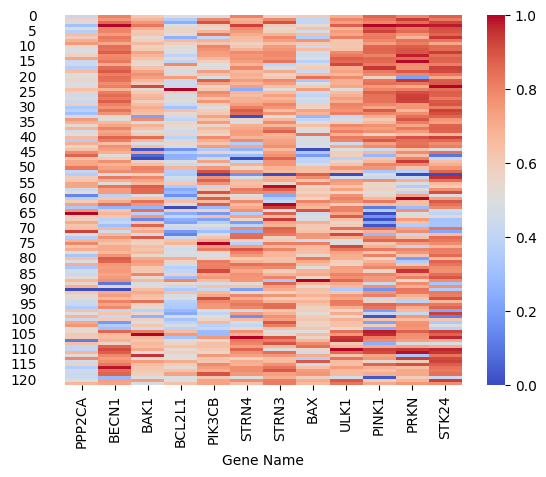

In [24]:
lut = {'Adjacent Kidney': 'darkgreen',
       'Metastasis CCRCC': 'darkred',
       'Primary Tumour CCRCC': 'olivedrab',
       'Primary Tumour Chromophobe': 'mediumblue',
       'Primary Tumour FH Def RCC': 'goldenrod',
       'Primary Tumour Oncocytic': 'purple',
       'Primary Tumour Papillary': 'palevioletred',
      }
row_colors = counts['Gene_Name'].map(lut)

ax = sns.heatmap(counts.drop(['Gene_Name'], axis=1), cmap = 'coolwarm')
#cmap = 'RdYlBu'/'coolwarm'/'bwr'/'seismic'

# plt.yticks([0,5,10,15,20,25,30,35,40,45,
#             50,55,60,65,70,75,80,85,90,95,
#             100,105,110,115,120,125
#            ],
#            ["X1","X2","X3","X4","X5","X1","X2","X3","X4","X5",
#             "X1","X2","X3","X4","X5","X1","X2","X3","X4","X5",
#             "X1","X2","X3","X4","X5","X1"
#            ]) #方案3，直接改變顯示

ax.tick_params(axis='y', which='major', pad=20.5, length=0) #y軸文字
ax.set_yticklabels(counts['Gene_Name'], rotation=0) # optionally use the groups as the tick labels

for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(xy=(-0.055, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax.get_yaxis_transform(), clip_on=False)) #add row_color

plt.tight_layout()
plt.savefig("nature.png", format="pdf", facecolor='white', bbox_inches="tight")